In [38]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import csv
#import dataset
url = "https://raw.githubusercontent.com/pirple/Data-Mining-With-Python/master/Part%202/single_family_home_values.csv"
df = pd.read_csv(url)

# Get to know the data

In [15]:
#show sample five rows of the dataset
df.sample(5)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
4012,10229021,2542 N Gaylord St,Denver,CO,80205,39.754038,-104.960635,2,1.0,5,831,3120,1905.0,2014-04-02,248000,2006-10-09,208000.0,413351
5708,49190741,3045 Wilson Ct,Denver,CO,80205,39.760166,-104.947116,2,1.0,4,1210,6030,1951.0,2001-05-22,148000,NaT,NaN,407302
8301,19402328,1336 York St,Denver,CO,80206,39.737556,-104.95944,3,2.0,8,1704,3100,1896.0,2004-06-03,349000,2002-09-10,285000.0,609964
14391,11586748,955 S Gilpin St,Denver,CO,80209,39.699184,-104.967885,3,3.0,6,2129,4690,1923.0,2014-05-23,720598,2009-06-18,638000.0,872443
9827,19832447,2255 Leyden St,Denver,CO,80207,39.750309,-104.915477,3,2.0,6,1582,6710,1937.0,2015-02-12,651500,2011-03-02,450000.0,743391


In [16]:
#The number of columns and rows
print("Number of columns: {0} and Number of row: {1}".format(len(df.columns),len(df.index)))

Number of columns: 18 and Number of row: 15000


In [4]:
# Column name
df.columns

Index(['id', 'address', 'city', 'state', 'zipcode', 'latitude', 'longitude',
       'bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'lastSaleDate', 'lastSaleAmount', 'priorSaleDate',
       'priorSaleAmount', 'estimated_value'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=15000, step=1)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [25]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [8]:
df.corr()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,1.000000,-0.007972,-0.092638,0.039591,0.076366,0.128491,0.094063,0.143069,0.045336,0.041342,0.069275,0.012363,0.126193
zipcode,-0.007972,1.000000,0.461953,0.394500,-0.018420,-0.007543,0.031346,0.000812,-0.037696,-0.174142,0.032898,0.033123,0.089104
latitude,-0.092638,0.461953,1.000000,0.499432,-0.083083,-0.237716,-0.213634,-0.256475,-0.092881,-0.105518,-0.126800,-0.225513,-0.266116
longitude,0.039591,0.394500,0.499432,1.000000,0.022375,0.107666,0.026108,0.067845,0.066228,0.060827,0.036747,0.097487,0.121984
bedrooms,0.076366,-0.018420,-0.083083,0.022375,1.000000,0.505931,0.712343,0.620965,0.158497,-0.061681,0.135036,0.211982,0.369125
bathrooms,0.128491,-0.007543,-0.237716,0.107666,0.505931,1.000000,0.686296,0.804179,0.259073,0.194597,0.296577,0.453678,0.715926
rooms,0.094063,0.031346,-0.213634,0.026108,0.712343,0.686296,1.000000,0.771194,0.175949,-0.047720,0.230537,0.370929,0.581023
squareFootage,0.143069,0.000812,-0.256475,0.067845,0.620965,0.804179,0.771194,1.000000,0.369244,0.115298,0.334441,0.506272,0.824506
lotSize,0.045336,-0.037696,-0.092881,0.066228,0.158497,0.259073,0.175949,0.369244,1.000000,0.285517,0.193421,0.226043,0.456539
yearBuilt,0.041342,-0.174142,-0.105518,0.060827,-0.061681,0.194597,-0.047720,0.115298,0.285517,1.000000,0.077553,0.113356,0.174430


Attibutes desciption:
1. ID: house id. Distinctive, each house had its own id and didn't have a duplicate (check this later)
2. State, city, zipcode, address, latitude, longitude: location of the house (categorical)
3. Rooms, bedrooms, bathrooms: room-related features (numberical but actually categorical)
4. SquareFootage, lotSize: features of house size (numerical)
5. YearBuilt: year when the house was built
6. Features of house price (numerical): 
    - lastSaleAmount (House price in the lastest sale)
    - priorSaleAmount (House price in the sale before the last sale)
    - estimated value (House price prediction for the next sale)
7. Features of sale date (datetime):
    - lastSaleDate (Date of the lastest sale date)
    - priorSaleAmount (Date the sale before the last sale)

# Data Cleaning

## Change data type

In [39]:
# Transform to datetime
df.lastSaleDate = pd.to_datetime(df.lastSaleDate)
df.priorSaleDate = pd.to_datetime(df.priorSaleDate)

In [59]:
df.select_dtypes(include=['object']).columns

Index(['address', 'city', 'state'], dtype='object')

In [60]:
df.select_dtypes(exclude=['object']).columns

Index(['id', 'zipcode', 'latitude', 'longitude', 'bedrooms', 'bathrooms',
       'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount',
       'estimated_value'],
      dtype='object')

## Check logic

In [304]:
df['id'].value_counts()

39525749     1
2017451      1
4272474      1
4272476      1
18197613     1
            ..
184293209    1
43114078     1
7308285      1
51038599     1
42961679     1
Name: id, Length: 14995, dtype: int64

There's no duplicate ID

### Address

In [13]:
# Check if there are any duplicate values in address
df['address'].value_counts()

3118 N Vine St               2
3650 N Adams St              2
2531 Birch St                1
3095 Fairfax St              1
3075 Fairfax St              1
                            ..
3150 N Fillmore St           1
2009 N Race St               1
2511 N Race St               1
2534 N Franklin St           1
100 S University Blvd # 1    1
Name: address, Length: 14998, dtype: int64

In [14]:
df[df['address'] == '3118 N Vine St']

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
4762,248507008,3118 N Vine St,Denver,CO,80205,nan,nan,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,670436
4764,216346608,3118 N Vine St,Denver,CO,80205,39.761214,-104.961873,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,671744


In [40]:
# These 2 houses with same address had many things in common, so this was duplicate
# We'll delete one out of two house
df.drop(df.index[4762],axis = 0, inplace = True)
df[df['address'] == '3118 N Vine St']

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
4764,216346608,3118 N Vine St,Denver,CO,80205,39.761214,-104.961873,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaT,NaN,671744


In [16]:
df[df['address'] == '3650 N Adams St']

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
3274,320948074,3650 N Adams St,Denver,CO,80205,nan,nan,4,4.0,7,2826,4690,2016.0,2017-05-23,735000,NaT,NaN,745537
6145,4277764,3650 N Adams St,Denver,CO,80205,nan,nan,1,1.0,3,472,9370,1926.0,2015-07-20,250000,NaT,NaN,745483


These 2 houses with same address had different features. The first house was built in 1926 and last sold in 2015. The second house was built in 2016 and last sold in 2017. We'll keep them and assume they're 2 different houses, built in 2 different times, in the same location.

### Sale Date

In [17]:
# Check if priorSaleDate happened before lastSaleDate
df[df['priorSaleDate'] > df['lastSaleDate']] 

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
520,51138584,14 N Pearl St,Denver,CO,80203,39.716824,-104.979979,1,2.0,5,2267,3994,1895.0,2000-07-13,267500,2004-05-11,47500.0,560032


We found 1 record that priorSaleDate > lastSaleDate. We'll switch the 2 dates in this case, priorSaleDate become lastSaleDate and vice versa

In [41]:
df[['priorSaleDate','lastSaleDate']] = df.apply(lambda x: pd.Series(sorted([x.priorSaleDate,x.lastSaleDate])), axis =1)

In [19]:
df[df['id'] == '51138584'] 

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
520,51138584,14 N Pearl St,Denver,CO,80203,39.716824,-104.979979,1,2.0,5,2267,3994,1895.0,2004-05-11,267500,2000-07-13,47500.0,560032


In [20]:
# Check if yearBuilt happened before priorSaleDate or lastSaleDate
df[(df['yearBuilt'] > df['priorSaleDate'].dt.year) | (df['yearBuilt'] > df['lastSaleDate'].dt.year)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
710,30546344,1125 W 13th Ave,Denver,CO,80204,39.737052,-105.002336,2,4.0,4,1550,1570,2012.0,2006-12-27,17000,2006-09-22,15000.0,503844
755,2965932,647 Knox Ct,Denver,CO,80204,39.726987,-105.032865,3,3.0,5,1300,6250,2007.0,2005-11-02,41000,2004-05-14,124000.0,433341
815,9582980,745 Julian St,Denver,CO,80204,39.728777,-105.031624,3,3.0,8,2074,5650,2008.0,2007-08-17,57000,2006-11-21,113327.0,416000
1584,28612659,1162 Kalamath St,Denver,CO,80204,39.734842,-104.999759,2,3.0,5,1122,3750,2007.0,2008-05-07,104500,2006-12-12,0.0,444055
1710,46263500,1926 Newton St,Denver,CO,80204,39.746983,-105.036634,5,4.0,8,3442,4760,2016.0,2015-07-21,425000,2002-04-22,250000.0,491674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14837,34921032,1058 S Race St,Denver,CO,80209,39.697294,-104.963732,3,5.0,11,3694,6300,2009.0,2008-12-23,430000,NaT,NaN,1923926
14838,43013840,1038 S Race St,Denver,CO,80209,39.69757,-104.963729,3,6.0,8,3950,6300,2011.0,2010-03-11,500000,1999-09-30,237200.0,2125347
14898,184309848,1059 S Columbine St,Denver,CO,80209,39.697264,-104.957282,4,6.0,8,3442,6160,2014.0,2013-08-15,535000,NaT,NaN,1802858
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,2003-06-19,357500.0,753935


We found 246 records that yearBuilt was after priorSaleDate and lastSaleDate. We can't and perhaps should not fix this issue. We'll assume that two sale dates belonged to the old house which was built on the same location and yearBuilt belonged to the current house

## Outliers

### Sale Amount

<AxesSubplot:>

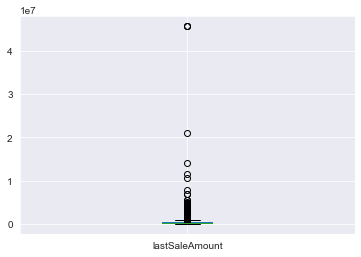

In [22]:
df.boxplot(column=['lastSaleAmount'])

<AxesSubplot:xlabel='lastSaleAmount', ylabel='estimated_value'>

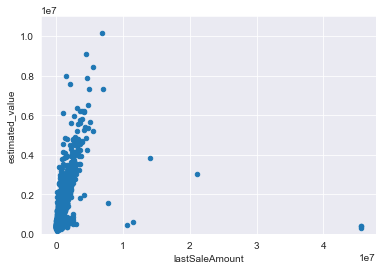

In [5]:
# scatter plot lastSaleAmount - estimated_value
var = 'lastSaleAmount'
data = pd.concat([df['estimated_value'],df[var]], axis = 1)
data.plot.scatter(x=var,y='estimated_value',ylim=(0,11000000))

In [23]:
df[df['lastSaleAmount'] == df['lastSaleAmount'].max()]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
2220,18197590,1350 Osceola St,Denver,CO,80204,39.737493,-105.037811,2,1.0,6,929,4690,1914.0,2007-01-19,45600000,2002-07-01,157000.0,402561
2473,18197589,1320 Osceola St,Denver,CO,80204,39.737062,-105.03781,2,1.0,4,700,6250,1953.0,2007-01-19,45600000,NaT,NaN,306400
2971,18197588,1330 Osceola St,Denver,CO,80204,39.737183,-105.03781,2,1.0,5,1262,4690,1907.0,2007-01-19,45600000,NaT,NaN,397880


We consider the highest lastSaleAmount values (over 45 millions) outliers cause they're awfully huge compared to estimated values and priorSaleAmount. We decide to delete these three values.

In [42]:
df=df[df['lastSaleAmount'] < 45600000]

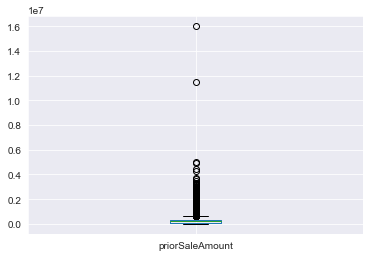

In [43]:
boxplot = df.boxplot(column=['priorSaleAmount'])

<AxesSubplot:xlabel='priorSaleAmount', ylabel='estimated_value'>

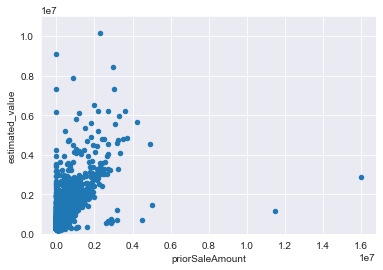

In [44]:
# scatter plot priorSaleAmount - estimated_value
var = 'priorSaleAmount'
data = pd.concat([df['estimated_value'],df[var]], axis = 1)
data.plot.scatter(x=var,y='estimated_value',ylim=(0,11000000))

We decide not to drop any value of priorSaleAmount cause the outlier pattern was not really clear.

### Property size

<AxesSubplot:xlabel='lotSize', ylabel='estimated_value'>

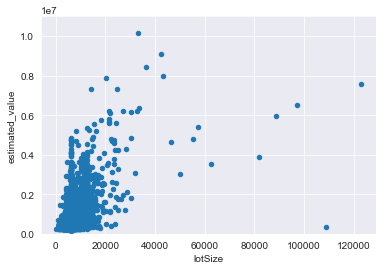

In [6]:
# scatter plot lotSize - estimated_value
var = 'lotSize'
data = pd.concat([df['estimated_value'],df[var]], axis = 1)
data.plot.scatter(x=var,y='estimated_value',ylim=(0,11000000))

We consider the bottom right value (large lotSize with very low estimated house price) an outlier and decide to delete it.

In [204]:
df[df['lotSize'] > 1e5]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
6044,216448725,2071 N Colorado Blvd # 58,Denver,CO,80205,39.748706,-104.940803,4,1.5,6,2256,108900,1945.0,2000-09-14,340000,NaT,NaN,349664
13655,51047101,600 S University Blvd,Denver,CO,80209,39.706183,-104.957094,5,6.0,14,7200,122839,2001.0,1999-02-23,2000000,NaT,NaN,7582992


In [45]:
df=df[df['lotSize'] != 108900]

## Fill missing values

### Count missing values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               14995 non-null  int64         
 1   address          14995 non-null  object        
 2   city             14995 non-null  object        
 3   state            14995 non-null  object        
 4   zipcode          14995 non-null  int64         
 5   latitude         14981 non-null  float64       
 6   longitude        14981 non-null  float64       
 7   bedrooms         14995 non-null  int64         
 8   bathrooms        14995 non-null  float64       
 9   rooms            14995 non-null  int64         
 10  squareFootage    14995 non-null  int64         
 11  lotSize          14995 non-null  int64         
 12  yearBuilt        14994 non-null  float64       
 13  lastSaleDate     14995 non-null  datetime64[ns]
 14  lastSaleAmount   14995 non-null  int64

In [9]:
#Count and percent of missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)
missing_percent = (missing/len(df) * 100).sort_values(ascending = False)
missing_data = pd.concat([missing,missing_percent],axis = 1, keys = ['missing_values','missing_percent'])
missing_data

,missing_values,missing_percent
priorSaleDate,3823,25.495165
priorSaleAmount,3709,24.734912
latitude,14,0.093364
longitude,14,0.093364
yearBuilt,1,0.006669


Text(0.5, 1.0, 'Count of missing data by feature')

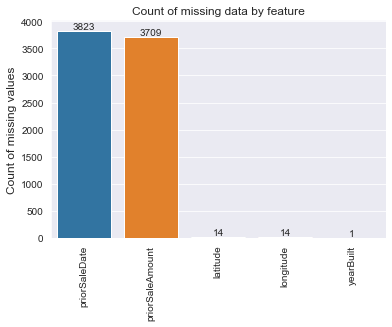

In [10]:
#Missing values column chart
f, ax = plt.subplots(figsize=(6, 4))
plt.xticks(rotation='90')
ax = sns.barplot(x=missing.index, y=missing)
ax.bar_label(ax.containers[0])
plt.ylabel('Count of missing values', fontsize=12)
plt.title('Count of missing data by feature', fontsize=12)

### yearBuilt & latitude & longitude

The missing values of yearBuilt, latitude and longitude features were significantly small and didn't affect to the analysis of the dataset. So we'll fill their missing values by the simplest way, which is filling with median and mode values.

In [47]:
df['yearBuilt'] = df['yearBuilt'].fillna(df['yearBuilt'].median())

In [48]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mode()[0])
df['longitude'] = df['longitude'].fillna(df['longitude'].mode()[0])

In [49]:
# Check remaining missing values
na = df.isnull().sum()
na = na[na > 0]
na

priorSaleDate      3823
priorSaleAmount    3709
dtype: int64

### priorSaleDate & priorSaleAmount

In [50]:
#When priorSaleDate and priorSaleAmount were missing simultaneously
df1 = df[(df['priorSaleDate'].isnull()) & (df['priorSaleAmount'].isnull())]
df1.shape

(3621, 18)

In case `priorSaleDate` and `priorSaleAmount` were missing simultaneously, we'll assume that there was no prior sale and the first transaction was recored through lastSaleDate and lastSaleAmount. Transform priorSaleDate = lastSaleDate and priorSaleAmount = lastSaleAmount in this case

In [51]:
df1.priorSaleDate = df1.lastSaleDate
df1.priorSaleAmount = df1.lastSaleAmount

In [52]:
df2 = df.merge(df1[['id','priorSaleDate','priorSaleAmount']],how='left',on='id')
df2.head(3)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate_x,priorSaleAmount_x,estimated_value,priorSaleDate_y,priorSaleAmount_y
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,NaT,NaN
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,2004-09-23,216935.0
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.76171,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,2008-04-03,330000.0


In [53]:
df2['priorSaleDate'] = df2['priorSaleDate_y'].fillna(df2['priorSaleDate_x'])
df2['priorSaleAmount'] = df2['priorSaleAmount_y'].fillna(df2['priorSaleAmount_x'])
df2.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate_x,priorSaleAmount_x,estimated_value,priorSaleDate_y,priorSaleAmount_y,priorSaleDate,priorSaleAmount
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,NaT,NaN,2004-05-13,165700.0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,2004-09-23,216935.0,2004-09-23,216935.0
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,2008-04-03,330000.0,2008-04-03,330000.0
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,NaT,NaN,2008-06-27,0.0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,NaT,NaN,2011-12-29,0.0


In [54]:
df = df2.drop(columns=['priorSaleDate_x','priorSaleDate_y','priorSaleAmount_x','priorSaleAmount_y'])
df.sample(3)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,estimated_value,priorSaleDate,priorSaleAmount
3151,143026207,2417 N Ogden St,Denver,CO,80205,39.752372,-104.974905,4,3.0,8,2048,4162,1891.0,2014-10-20,544000,617520,2013-11-13,265000.0
8268,51307214,1633 Vine St,Denver,CO,80206,39.742349,-104.962575,5,4.0,10,3493,6250,1904.0,1999-04-12,369500,890616,1999-04-12,369500.0
3779,34328968,1920 E 24th Ave,Denver,CO,80205,39.751749,-104.964213,2,2.0,6,1326,2970,1900.0,2011-11-08,300000,546380,2008-12-18,295000.0


Also, we assume that priorSaleAmount = 0 means there's no prior sale and we'll also transform priorSaleDate = lastSaleDate and priorSaleAmount = lastSaleAmount for this case

In [55]:
df.priorSaleDate[df.priorSaleAmount == 0] = df.lastSaleDate
df.priorSaleAmount[df.priorSaleAmount == 0] = df.lastSaleAmount

In [56]:
# Check remaining missing values
na = df.isnull().sum()
na = na[na > 0]
na

priorSaleDate      202
priorSaleAmount     88
dtype: int64

In [57]:
df['priorSaleAmount']=df['priorSaleAmount'].fillna(df['priorSaleAmount'].median())

In [58]:
df['priorSaleDate']=df['priorSaleDate'].fillna(df['priorSaleDate'].mode()[0])

In [59]:
# Check if there is any remaining missing value
na = df.isnull().sum()
na = na[na > 0]
na

Series([], dtype: int64)

# Analysis

## Add features

In [60]:
# Sale period
df['yearLastSale']=pd.DatetimeIndex(df.lastSaleDate).year
df['yearPriorSale']=pd.DatetimeIndex(df.priorSaleDate).year
df['sale_period']=df['yearLastSale']-df['yearPriorSale']

In [61]:
# Price change
df['price_change']=df['lastSaleAmount'] - df['priorSaleAmount']

In [62]:
df['price_change_sqft']=df['price_change']/df['squareFootage']
df['price_change_sqft_year']=df['price_change_sqft']/df['sale_period']
df['price_change_sqft_year'].replace([np.inf,-np.inf,np.nan],0,inplace=True)

In [63]:
df['price_change_lot']=df['price_change']/df['lotSize']
df['price_change_lot_year']=df['price_change_lot']/df['sale_period']
df['price_change_lot_year'].replace([np.inf,-np.inf,np.nan],0,inplace=True)

In [64]:
df.corr().loc['estimated_value',:].sort_values(ascending = False)

estimated_value           1.000000
squareFootage             0.824567
lastSaleAmount            0.749665
bathrooms                 0.715957
priorSaleAmount           0.613209
rooms                     0.581017
lotSize                   0.476829
bedrooms                  0.369178
price_change              0.278421
yearBuilt                 0.174497
price_change_lot          0.163851
price_change_lot_year     0.163186
id                        0.126304
longitude                 0.121832
zipcode                   0.089098
price_change_sqft         0.075538
price_change_sqft_year    0.072001
sale_period               0.030290
yearLastSale              0.023726
yearPriorSale            -0.008572
latitude                 -0.265831
Name: estimated_value, dtype: float64

House Price is affected by both house size (squareFootage) and lot size. Property can have tiny living space on a huge land or a big house that takes up most of the lot size. In this dataset, price change per lotsize per year had a higher correlation with estimated_value than price change per squarefootage per year did. So we'll choose price_change_lot_year variable for further analysis.

In [65]:
df = df.drop(columns=['price_change_sqft','price_change_sqft_year','price_change','price_change_lot'])

In [27]:
pd.options.display.max_columns = None

In [28]:
df.sample(3)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,estimated_value,priorSaleDate,priorSaleAmount,yearLastSale,yearPriorSale,sale_period,price_change_lot_year
7208,51257398,740 Steele St,Denver,CO,80206,39.728126,-104.949186,3,2.0,7,1587,5950,1920.0,2015-03-16,735000,780101,1999-09-09,300000.0,2015,1999,16,4.569328
13561,23766958,437 S Pearl St,Denver,CO,80209,39.708603,-104.980695,2,2.0,5,1307,3120,1900.0,2013-08-06,402000,562113,2008-06-18,361000.0,2013,2008,5,2.628205
3795,43186374,3633 N York St,Denver,CO,80205,39.767610,-104.960095,1,1.0,4,1071,4690,1926.0,2016-10-24,319000,401467,2003-04-02,169900.0,2016,2003,13,2.445465


## Analyze estimated_value

In [44]:
df['estimated_value'].describe()

count    1.499500e+04
mean     6.372332e+05
std      5.044824e+05
min      1.477670e+05
25%      3.984655e+05
50%      5.184760e+05
75%      6.881620e+05
max      1.014531e+07
Name: estimated_value, dtype: float64

<AxesSubplot:xlabel='estimated_value', ylabel='Density'>

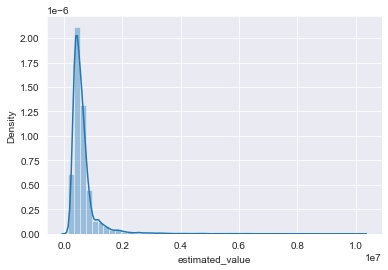

In [66]:
# histogram/distribution
sns.distplot(df['estimated_value'])

From the histogram above, it can be seen clearly that `estimated_value` deviated from normal distribution and was right skewed (also called positive skewness). 

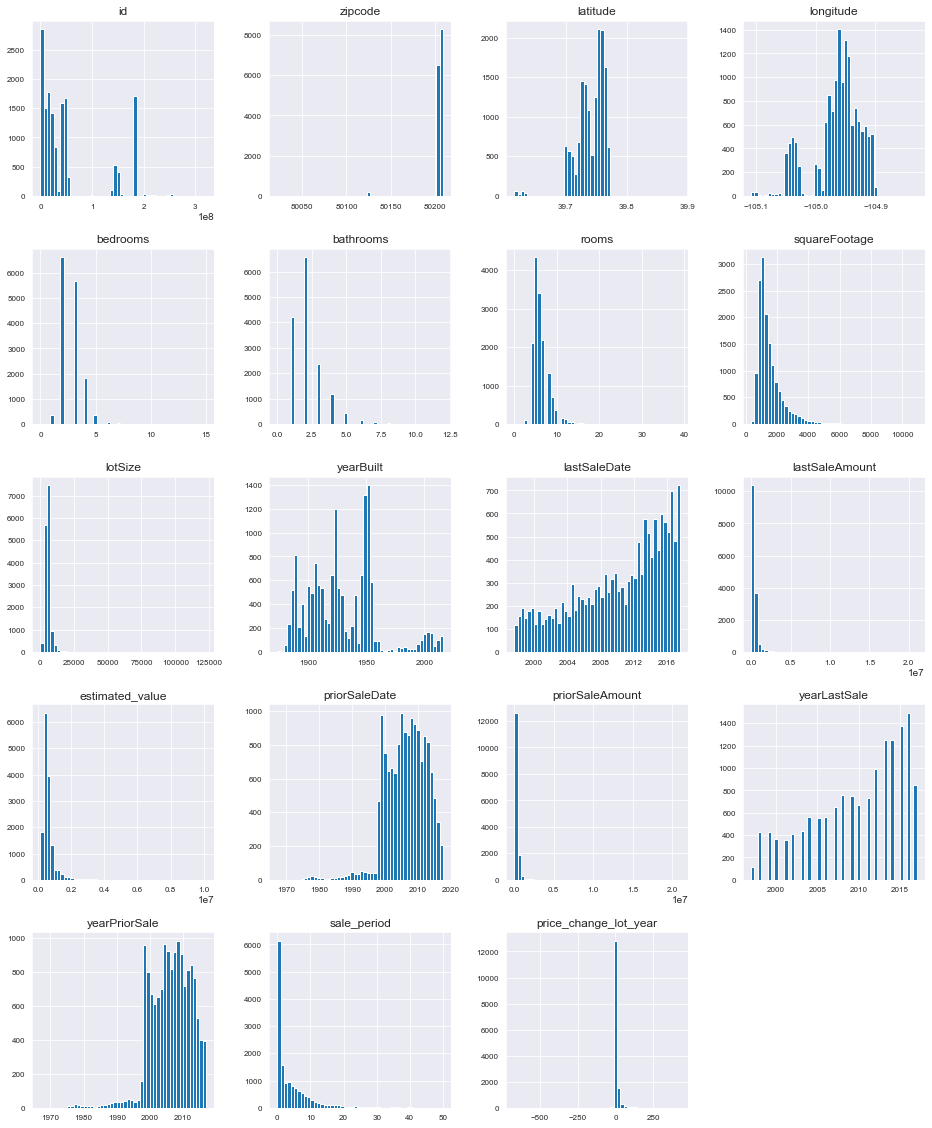

In [87]:
df_num = df.select_dtypes(exclude=['object'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Features such as `squareFootage`, `rooms`, `bathrooms` shared a similar distribution to with `estimated_value`. Other features such as `bedrooms`,`lotSize`,`lastSaleAmount`,`priorSaleAmount` also seemed to have similar distribution though it's not clear to see as the prior variables. It's notable that these features had the top highest correlattion with `estimated_value`.

In [88]:
df.corr().loc['estimated_value',:].sort_values(ascending = False)

estimated_value          1.000000
squareFootage            0.824567
lastSaleAmount           0.749665
bathrooms                0.715957
priorSaleAmount          0.613209
rooms                    0.581017
lotSize                  0.476829
bedrooms                 0.369178
yearBuilt                0.174497
price_change_lot_year    0.163186
id                       0.126304
longitude                0.121832
zipcode                  0.089098
sale_period              0.030290
yearLastSale             0.023726
yearPriorSale           -0.008572
latitude                -0.265831
Name: estimated_value, dtype: float64

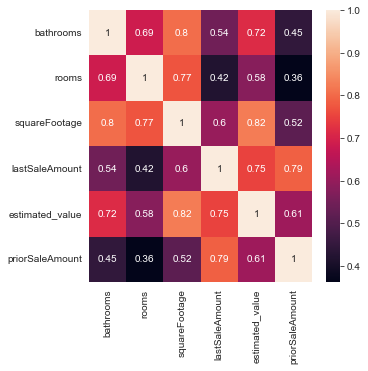

In [89]:
# most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat['estimated_value'])>0.5]
plt.figure(figsize=(5,5))
g = sns.heatmap(df[top_corr_features].corr(),annot=True)

There were 5 features highly positive correlated with estimated_value (over 0.5); they're respectively `squareFootage`,`lastSaleAmount`,`bathrooms`,`priorSaleAmount` and `rooms`. This means when these features increased in value, it also caused estimated house price to increase its value.

### Numerical variables

<AxesSubplot:xlabel='squareFootage', ylabel='estimated_value'>

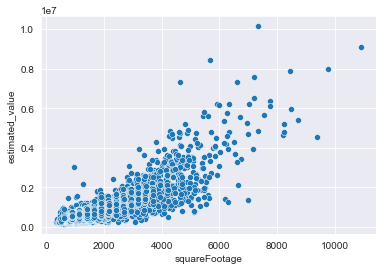

In [99]:
sns.scatterplot(df.squareFootage,df.estimated_value)

<AxesSubplot:xlabel='lastSaleAmount', ylabel='estimated_value'>

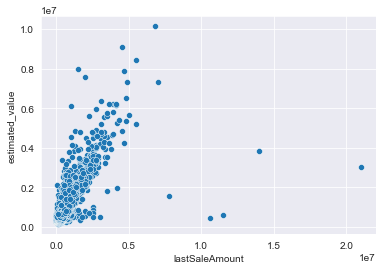

In [98]:
sns.scatterplot(df.lastSaleAmount,df.estimated_value)

<AxesSubplot:xlabel='priorSaleAmount', ylabel='estimated_value'>

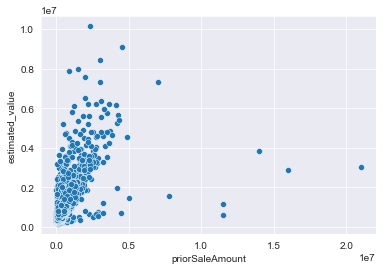

In [97]:
sns.scatterplot(df.priorSaleAmount,df.estimated_value)

Comment:
The three variables all seemed to have positive linear relationships with estimated_value. While the line relationship between squareFootage and predicted price was a gentle slope, the slopes in priorSaleAmount and lastSaleAmount scatter charts were steeper. Especially, priorSaleAmount had lots of values nearly to zero.

### Categorical variables

<AxesSubplot:xlabel='zipcode', ylabel='estimated_value'>

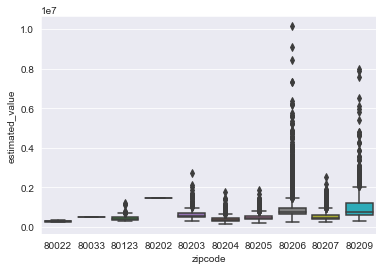

In [74]:
sns.boxplot(df.zipcode,df.estimated_value)

Estimated_value spread its value significantly in zipcode 80206 and 80209.

In [116]:
df.groupby('zipcode')['estimated_value'].describe()

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
80022,2.0,2.918580e+05,73687.597667,239753.0,265805.50,291858.0,317910.50,343963.0
80033,2.0,4.914565e+05,3700.289786,488840.0,490148.25,491456.5,492764.75,494073.0
80123,184.0,4.425260e+05,137226.326260,299492.0,351565.50,383602.5,496129.50,1222940.0
80202,1.0,1.461697e+06,NaN,1461697.0,1461697.00,1461697.0,1461697.00,1461697.0
80203,385.0,6.625648e+05,287492.973484,273748.0,514611.00,564445.0,699112.00,2748105.0
80204,2552.0,3.846096e+05,125201.756978,147767.0,303305.00,350190.0,443988.25,1775942.0
80205,3578.0,4.983229e+05,140262.536787,215531.0,408533.75,465309.5,564518.25,1846191.0
80206,2384.0,1.009121e+06,854653.363310,264843.0,629327.75,727722.0,956707.25,10145310.0
80207,4047.0,5.384328e+05,225409.520164,265666.0,388014.50,464568.0,614900.00,2497192.0


Zipcode 80022, 80033, and 80202 had small amount of houses, thus they didn't have much statistical meaning. Zipcode 80206 and 80209 had the top highest medians of house prices. These 2 zipcodes also owned the two highest max values of house prices. However, std dev of house prices in zipcode 80206 and 80209 were the top 2 highest, which means that house prices in these areas fluctuated the most. 

<AxesSubplot:xlabel='bathrooms', ylabel='estimated_value'>

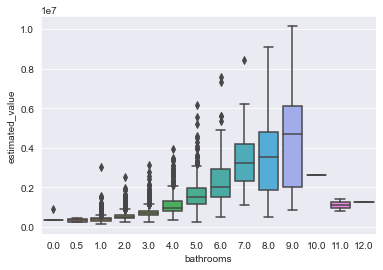

In [64]:
sns.boxplot(df.bathrooms,df.estimated_value)

In [117]:
df.groupby('bathrooms')['estimated_value'].describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.0,7.0,4.223587e+05,2.063764e+05,333325.0,339257.50,344748.0,354966.50,889990.0
0.5,9.0,3.333864e+05,7.200038e+04,234637.0,257073.00,356507.0,384252.00,442251.0
1.0,4199.0,3.965511e+05,1.203828e+05,147767.0,320435.50,374157.0,438597.50,3045688.0
2.0,6575.0,5.313214e+05,1.485698e+05,225664.0,426424.00,510061.0,613533.00,2512946.0
3.0,2367.0,7.161324e+05,2.368770e+05,250456.0,573517.50,681530.0,797658.00,3128173.0
4.0,1165.0,1.091877e+06,4.591958e+05,369582.0,775898.00,975684.0,1295331.00,3940444.0
5.0,414.0,1.676432e+06,7.931881e+05,264843.0,1141084.25,1532411.5,1944702.25,6141671.0
6.0,151.0,2.356063e+06,1.261220e+06,505232.0,1494875.00,2008162.0,2933704.00,7582992.0
7.0,58.0,3.289840e+06,1.451889e+06,1097989.0,2323419.00,3221421.5,4206158.00,8424973.0


It can be seen from the box plot that bathrooms variable was positively correlated with estimated_value. When the number of bathrooms went up, estimated price also increased and reached its peak when the number of bathrooms was 9. However, the trend was vague when the number of bathrooms were more than 9, it can be explained that there was a small number of houses which had more than 9 bathrooms. In conclusion, Denver residents preferred houses with more bathrooms, but houses with too many bathrooms didn't seem attractive to them.

<AxesSubplot:xlabel='rooms', ylabel='estimated_value'>

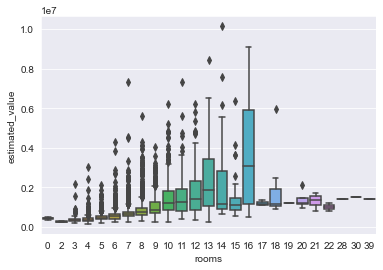

In [100]:
sns.boxplot(df.rooms,df.estimated_value)

In [118]:
df.groupby('rooms')['estimated_value'].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,9.0,4.412077e+05,4.327364e+04,355357.0,417243.00,453661.0,461609.00,494073.0
2,4.0,2.691148e+05,2.334781e+04,241357.0,258118.75,268727.0,279723.00,297648.0
3,104.0,3.990271e+05,2.462781e+05,217998.0,281586.75,349271.0,416224.00,2143753.0
4,2114.0,3.841449e+05,1.300713e+05,147767.0,310554.00,369583.5,422079.00,3045688.0
5,4349.0,4.678890e+05,1.342270e+05,214130.0,377731.00,442628.0,539883.00,2098282.0
6,3417.0,5.507993e+05,2.107912e+05,239753.0,417680.00,527840.0,631499.00,4291944.0
7,2175.0,6.990058e+05,3.431475e+05,229750.0,525500.00,639536.0,772472.00,7317046.0
8,1318.0,8.918397e+05,5.239328e+05,296286.0,612990.50,740598.0,975508.00,5586447.0
9,691.0,1.033889e+06,5.321954e+05,261156.0,683196.50,867062.0,1234487.00,4035431.0


The relationship between rooms and estimated price followed the trend of bathrooms and estimated value, though the pattern was not as transparent as the case of bathrooms. Estimated house price values climbed up when rooms quantity rose. Estimated price had the highest median and std dev values both in house with 16 rooms. When the number of rooms exceeded 16, there was no clear trend because houses quantities were significantly small. In the case of rooms, Denver residents also preferred houses with more rooms, but houses with too many rooms were unattractive to them and didn't have many sale records.

## Analyze price_change_lot_year

In [67]:
df.corr().loc['price_change_lot_year',:].sort_values(ascending = False)

price_change_lot_year    1.000000
lastSaleAmount           0.233632
yearPriorSale            0.188376
bathrooms                0.181459
yearLastSale             0.173475
estimated_value          0.163186
squareFootage            0.127771
rooms                    0.089192
id                       0.073626
bedrooms                 0.055870
zipcode                  0.036064
yearBuilt                0.035557
longitude                0.033092
latitude                 0.002017
sale_period             -0.032112
lotSize                 -0.067145
priorSaleAmount         -0.132128
Name: price_change_lot_year, dtype: float64

In [68]:
df['trend']=df['price_change_lot_year'].apply(lambda x:'up' if x>0 else ('down' if x<0 else 'same'))
df.sample()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,estimated_value,priorSaleDate,priorSaleAmount,yearLastSale,yearPriorSale,sale_period,price_change_lot_year,trend
14215,184306176,1020 E Dakota Ave,Denver,CO,80209,39.70908,-104.975035,3,3.0,7,1606,3750,1889.0,2015-02-25,510000,675751,2014-02-24,333000.0,2015,2014,1,47.2,up


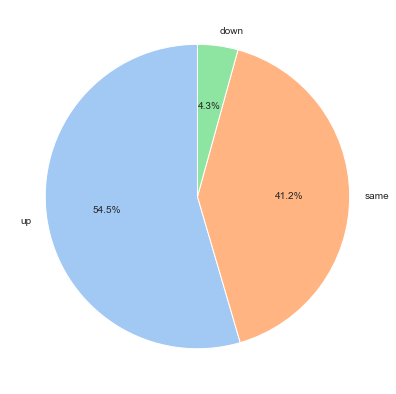

In [348]:
sizes=np.array([8178,6174,643])
labels= ['up','same','down']
colors = sns.color_palette('pastel')
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,labels=labels,colors=colors,
        autopct='%1.1f%%',startangle=90)
plt.show()

More than half of the houses had their prices rising (54,5%). The number of houses remaining the same price came second with 41,2% (including houses not having prior sale). The number of decreased-price houses accounted for the smallest portion with only 4,3%.

In [69]:
df_up = df[df['trend']=='up']
df_down = df[df['trend']=='down']
df_same = df[df['trend']=='same']

In [70]:
pivot = df.pivot_table(index ='trend',values =['bedrooms','bathrooms','rooms','squareFootage','lotSize','yearBuilt','lastSaleAmount',
       'priorSaleAmount','yearLastSale','yearPriorSale','price_change_lot_year','sale_period','estimated_value'],aggfunc=np.median)
pivot = pivot.reset_index()
pivot

,trend,bathrooms,bedrooms,estimated_value,lastSaleAmount,lotSize,price_change_lot_year,priorSaleAmount,rooms,sale_period,squareFootage,yearBuilt,yearLastSale,yearPriorSale
0,down,2.0,3,504860.0,235000.0,6240,-1.656663,288800.0,6,4,1299,1932.0,2010,2005
1,same,2.0,3,472317.0,222000.0,6230,0.000000,200000.0,6,0,1217,1928.0,2007,2007
2,up,2.0,3,548975.5,383316.5,5940,4.400000,239900.0,6,5,1292,1924.0,2014,2006


1. SquareFootage's median of down-price houses was higher than that of up-price house, 1299 compared to 1292.
2. The same with lotSize, downtrend houses had lotSize's median of 6240 while the figure for uptrend houses was 5940.
3. Downtrend houses had higher median value of priorSaleAmount than uptrend houses did, but it's opposite when it came to lastSaleAmount. Median value of lastSaleAmount of uptrend houses far exceeded that of downtrend houses and houses that remained the same prices.

Text(0.5, 1.0, 'Difference in medians of quantitive variables')

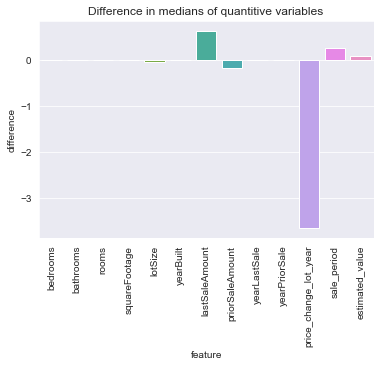

In [234]:
feature = ['bedrooms','bathrooms','rooms','squareFootage','lotSize','yearBuilt','lastSaleAmount',
       'priorSaleAmount','yearLastSale','yearPriorSale','price_change_lot_year','sale_period','estimated_value']
diff = pd.DataFrame()
diff['feature'] = feature
diff['difference'] = [(df_up[f].median()-df_down[f].median())/df_down[f].median()
                       for f in feature]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)
plt.title('Difference in medians of quantitive variables', fontsize=12)

When comparing difference in medians of quantitive variables, `lastSaleAmount` had the largest gap between the two dataset df_up (up-price houses) and df_down (down-price houses).

<AxesSubplot:xlabel='zipcode'>

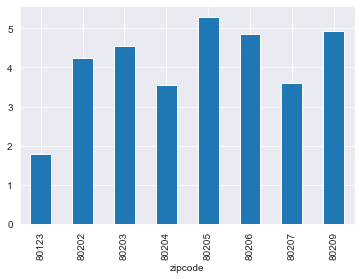

In [71]:
df_up.groupby('zipcode')['price_change_lot_year'].median().plot(kind="bar")

<AxesSubplot:xlabel='zipcode'>

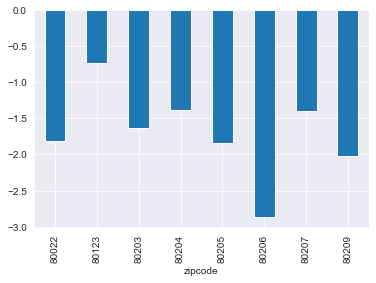

In [285]:
df_down.groupby('zipcode')['price_change_lot_year'].median().plot(kind="bar")

1. Among up-price houses, the lowest growth rate fell into zipcode 80123. Interestingly, zipcode 80123 also saw the smallest negative growth rate.
2. Apart from zipcode 80123, other zipcodes witnessed similar price-change rate trends , in both positive and negative ones.
3. Zipcode 80206 had the strongest negative rate, while zipcode 80205 had the highest positive rate.

<AxesSubplot:xlabel='bathrooms'>

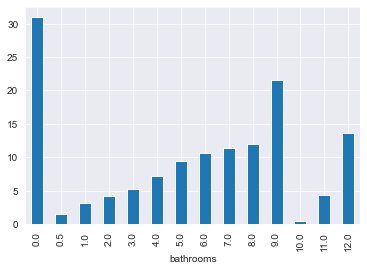

In [72]:
df_up.groupby('bathrooms')['price_change_lot_year'].median().plot(kind="bar")

In [292]:
df_up_bathrooms = df_up[df_up['bathrooms'].isin([0,9])]
df_up_bathrooms.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,estimated_value,priorSaleAmount,yearLastSale,yearPriorSale,sale_period,price_change_lot_year
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.00000,10.0000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000
mean,1.055363e+08,80206.300000,39.726827,-104.966131,4.000000,5.40000,11.6000,4171.500000,13776.900000,1952.200000,2.479161e+06,3.127425e+06,8.114000e+05,2012.200000,2004.600000,7.600000,57.340425
std,9.366194e+07,2.002776,0.020955,0.019146,2.666667,4.64758,8.4879,3006.763792,10796.707291,53.781038,2.310987e+06,3.516869e+06,7.521600e+05,4.848826,6.569289,7.647803,84.501929
min,3.548633e+06,80204.000000,39.699654,-104.997340,0.000000,0.00000,0.0000,620.000000,2111.000000,1886.000000,3.450000e+05,3.359070e+05,2.800000e+04,2005.000000,1994.000000,1.000000,1.950769
25%,2.183630e+07,80205.000000,39.708932,-104.975334,2.250000,0.00000,5.2500,1712.500000,4837.500000,1899.250000,6.330075e+05,4.779625e+05,2.620000e+05,2008.250000,2001.250000,1.500000,4.465213
50%,9.405281e+07,80206.000000,39.725766,-104.961551,4.000000,9.00000,13.0000,3868.500000,10781.000000,1952.500000,1.272500e+06,1.210632e+06,6.500000e+05,2013.500000,2004.000000,3.500000,25.607129
75%,1.843002e+08,80208.250000,39.737430,-104.950693,5.750000,9.00000,14.7500,6784.750000,21965.750000,2004.750000,4.460702e+06,4.584689e+06,1.300000e+06,2016.500000,2009.500000,12.750000,57.988506
max,2.510076e+08,80209.000000,39.764945,-104.946513,9.000000,9.00000,30.0000,8456.000000,33100.000000,2016.000000,6.800000e+06,1.014531e+07,2.300000e+06,2017.000000,2016.000000,23.000000,271.040000


1. Number of houses not having bathroom or having 9 bathrooms was quite small so it didn't say much.
2. For houses having 1 to 8 bathrooms, when the number of bathrooms rose, price growth rate also climbed, thus the number of bathrooms in this range was positively correlated with price change rate.

<AxesSubplot:xlabel='rooms'>

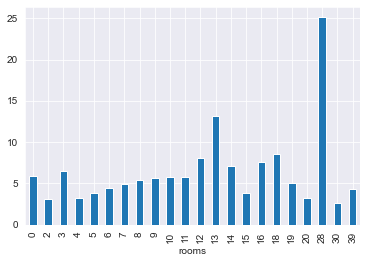

In [291]:
df_up.groupby('rooms')['price_change_lot_year'].median().plot(kind="bar")

<AxesSubplot:xlabel='rooms'>

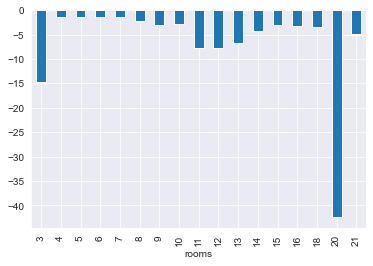

In [247]:
df_down.groupby('rooms')['price_change_lot_year'].median().plot(kind="bar")

In [302]:
df_up_rooms = df_up[df_up['rooms']==28]
df_down_rooms = df_down[df_down['rooms'].isin([3,20])]
display(df_up_rooms.describe())
display(df_down_rooms.describe())

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,estimated_value,priorSaleAmount,yearLastSale,yearPriorSale,sale_period,price_change_lot_year
count,1.0,1.0,1.00000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
mean,8665808.0,80206.0,39.73935,-104.953847,9.0,8.0,28.0,5274.0,6250.0,1896.0,765000.0,1418630.0,608000.0,2007.0,2006.0,1.0,25.12
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8665808.0,80206.0,39.73935,-104.953847,9.0,8.0,28.0,5274.0,6250.0,1896.0,765000.0,1418630.0,608000.0,2007.0,2006.0,1.0,25.12
25%,8665808.0,80206.0,39.73935,-104.953847,9.0,8.0,28.0,5274.0,6250.0,1896.0,765000.0,1418630.0,608000.0,2007.0,2006.0,1.0,25.12
50%,8665808.0,80206.0,39.73935,-104.953847,9.0,8.0,28.0,5274.0,6250.0,1896.0,765000.0,1418630.0,608000.0,2007.0,2006.0,1.0,25.12
75%,8665808.0,80206.0,39.73935,-104.953847,9.0,8.0,28.0,5274.0,6250.0,1896.0,765000.0,1418630.0,608000.0,2007.0,2006.0,1.0,25.12
max,8665808.0,80206.0,39.73935,-104.953847,9.0,8.0,28.0,5274.0,6250.0,1896.0,765000.0,1418630.0,608000.0,2007.0,2006.0,1.0,25.12


,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,estimated_value,priorSaleAmount,yearLastSale,yearPriorSale,sale_period,price_change_lot_year
count,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,3.421442e+07,80205.000000,39.745201,-104.981230,4.166667,2.833333,8.666667,2098.166667,5148.333333,1911.666667,246211.000000,6.346005e+05,1.072515e+06,2011.666667,2007.166667,4.500000,-24.755951
std,5.625509e+07,0.894427,0.013313,0.039049,5.671567,2.857738,8.778762,2066.897329,2127.622304,17.637082,220895.658495,4.879642e+05,1.933511e+06,3.932768,6.853223,6.442049,19.785094
min,2.965940e+06,80204.000000,39.731966,-105.032736,1.000000,1.000000,3.000000,517.000000,2300.000000,1886.000000,33606.000000,2.375960e+05,4.600000e+04,2006.000000,1998.000000,1.000000,-52.958400
25%,6.678769e+06,80204.250000,39.738005,-105.012957,1.000000,1.000000,3.000000,673.250000,3672.500000,1900.000000,90250.000000,3.028888e+05,1.823595e+05,2009.000000,2001.750000,1.000000,-32.419175
50%,1.578751e+07,80205.000000,39.738714,-104.958982,1.000000,1.000000,3.000000,1131.500000,5460.000000,1916.000000,189830.000000,4.342220e+05,3.207190e+05,2012.500000,2009.000000,1.000000,-29.569631
75%,1.807596e+07,80205.750000,39.754822,-104.955952,4.750000,4.750000,15.750000,3021.500000,6250.000000,1926.000000,333915.000000,8.370890e+05,5.387375e+05,2014.500000,2011.750000,4.750000,-8.309443
max,1.482643e+08,80206.000000,39.763850,-104.950792,15.000000,7.000000,20.000000,5637.000000,8080.000000,1928.000000,625000.000000,1.471074e+06,5.000000e+06,2016.000000,2015.000000,17.000000,-1.846307


1. Number of houses not having room, having 20 or 28 rooms was quite small so it didn't tell much from the chart.
2. In case of positive price change, with houses having 4 to 13 rooms, the number of rooms was positively correlated with price change rate. Number of rooms outside this range didn't show a clear pattern.
3. In case of negative price change, price change rate varied steadily among the number of rooms. Houses having 11 to 13 rooms had the strongest negative rate.

<AxesSubplot:xlabel='bedrooms'>

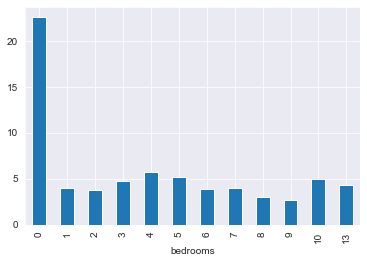

In [257]:
df_up.groupby('bedrooms')['price_change_lot_year'].median().plot(kind="bar")

<AxesSubplot:xlabel='bedrooms'>

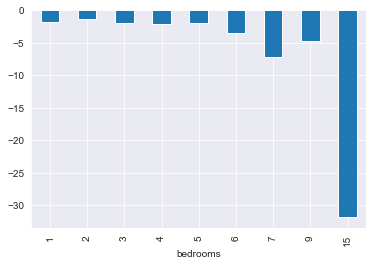

In [258]:
df_down.groupby('bedrooms')['price_change_lot_year'].median().plot(kind="bar")

In [299]:
df_up_bedrooms = df_up[df_up['bedrooms']==0]
df_down_bedrooms = df_down[df_down['bedrooms']==15]
display(df_up_bedrooms.describe())
display(df_down_bedrooms.describe())

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,estimated_value,priorSaleAmount,yearLastSale,yearPriorSale,sale_period,price_change_lot_year
count,2.000000e+00,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,9.407948e+07,80205.000000,39.722828,-104.992055,0.0,0.500000,1.000000,967.000000,5605.000000,1949.000000,8.750000e+05,298357.000000,387500.000000,2016.000000,2006.500000,9.500000,22.576702
std,1.275915e+08,1.414214,0.005400,0.064407,0.0,0.707107,1.414214,872.569768,502.045815,35.355339,1.096016e+06,80610.173055,456083.873865,1.414214,6.363961,7.778175,31.374615
min,3.858650e+06,80204.000000,39.719009,-105.037598,0.0,0.000000,0.000000,350.000000,5250.000000,1924.000000,1.000000e+05,241357.000000,65000.000000,2015.000000,2002.000000,4.000000,0.391499
25%,4.896906e+07,80204.500000,39.720918,-105.014827,0.0,0.250000,0.500000,658.500000,5427.500000,1936.500000,4.875000e+05,269857.000000,226250.000000,2015.500000,2004.250000,6.750000,11.484100
50%,9.407948e+07,80205.000000,39.722828,-104.992055,0.0,0.500000,1.000000,967.000000,5605.000000,1949.000000,8.750000e+05,298357.000000,387500.000000,2016.000000,2006.500000,9.500000,22.576702
75%,1.391899e+08,80205.500000,39.724737,-104.969284,0.0,0.750000,1.500000,1275.500000,5782.500000,1961.500000,1.262500e+06,326857.000000,548750.000000,2016.500000,2008.750000,12.250000,33.669303
max,1.843003e+08,80206.000000,39.726646,-104.946513,0.0,1.000000,2.000000,1584.000000,5960.000000,1974.000000,1.650000e+06,355357.000000,710000.000000,2017.000000,2011.000000,15.000000,44.761905


,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,estimated_value,priorSaleAmount,yearLastSale,yearPriorSale,sale_period,price_change_lot_year
count,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
mean,148264267.0,80206.0,39.738774,-104.961362,15.0,7.0,20.0,5637.0,8080.0,1898.0,625000.0,1471074.0,5000000.0,2015.0,1998.0,17.0,-31.850612
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,148264267.0,80206.0,39.738774,-104.961362,15.0,7.0,20.0,5637.0,8080.0,1898.0,625000.0,1471074.0,5000000.0,2015.0,1998.0,17.0,-31.850612
25%,148264267.0,80206.0,39.738774,-104.961362,15.0,7.0,20.0,5637.0,8080.0,1898.0,625000.0,1471074.0,5000000.0,2015.0,1998.0,17.0,-31.850612
50%,148264267.0,80206.0,39.738774,-104.961362,15.0,7.0,20.0,5637.0,8080.0,1898.0,625000.0,1471074.0,5000000.0,2015.0,1998.0,17.0,-31.850612
75%,148264267.0,80206.0,39.738774,-104.961362,15.0,7.0,20.0,5637.0,8080.0,1898.0,625000.0,1471074.0,5000000.0,2015.0,1998.0,17.0,-31.850612
max,148264267.0,80206.0,39.738774,-104.961362,15.0,7.0,20.0,5637.0,8080.0,1898.0,625000.0,1471074.0,5000000.0,2015.0,1998.0,17.0,-31.850612


1. Number of houses not having bedroom or having 15 bedrooms was notably small so it didn't tell much from the chart.
2. Among up-price houses, price growth rates varied equally regardless the number of bedrooms. Houses having 4 bedrooms experienced the highest price growth rate.
3. The same pattern applied to the down-price group. Houses having 7 bedrooms had the strongest decline.

<AxesSubplot:xlabel='yearBuilt'>

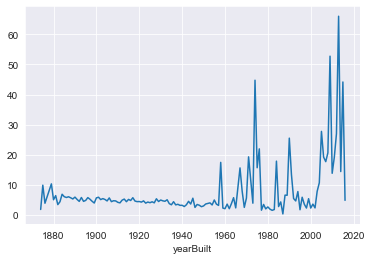

In [242]:
df_up.groupby(df['yearBuilt'])['price_change_lot_year'].median().plot()

House built after 1960s, especially from 2000 onwards experienced high price change rates, but the trend was highly volatile.

<AxesSubplot:xlabel='yearPriorSale'>

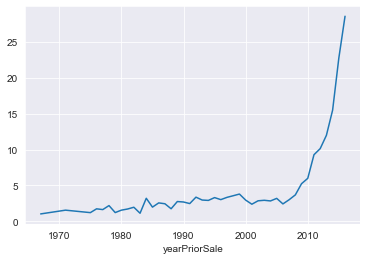

In [ ]:
df_up.groupby(df['yearPriorSale'])['price_change_lot_year'].median().plot()

House having prior sale from around 2010 onwards: price change rate rocketed remarkably.

<AxesSubplot:xlabel='yearLastSale'>

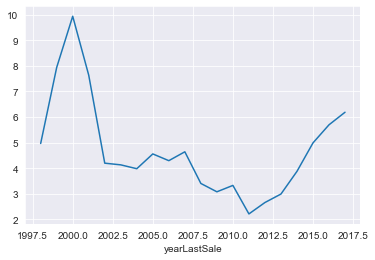

In [274]:
df_up.groupby(df['yearLastSale'])['price_change_lot_year'].median().plot()

1. Houses last sale in 2000: price change rate reached its peak.
2. Houses last sale between 2002 and around 2011: saw a sharp drop, then fluctuation until hit the bottom in price change rate (downtrend in general).
3. Houses last sale from 2012 afterwards: price change rate grew non-stop.